In this file, Let us club all the Independent variables data with SP1 dataset and try predictive modelling

In [578]:
## Importing required packages
import pandas as pd 
import numpy as np 
import missingno as miss
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m


# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

In [579]:
SP1 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP1_output.csv")
IV_data = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -2/Processed data part2/IV_data.csv")

In [580]:
SP1.head()

,country,Urban_GG_Emissions
0,Australia,35825513
1,Austria,4065351
2,Belarus,4898939
3,Belgium,9557424
4,Bulgaria,3539432


In [581]:
SP1.shape

(40, 2)

In [582]:
IV_data.head()

,country,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,Afghanistan,39,7474525.0,502.115487,8.401,25.754,1412.912141,2.340455e+07
1,Albania,50,1691769.0,5352.857411,30.705,61.229,9310.845162,1.201022e+09
2,Algeria,56,10827998.0,3948.343279,30.510,73.189,289.027090,1.381890e+09
3,American Samoa,1,12576.0,NaN,66.211,87.147,NaN,NaN
4,Andorra,1,22151.0,40886.391160,58.450,87.984,3984.194514,NaN


In [583]:
IV_data.shape

(177, 8)

In [584]:
## There is a wide gap in the dataset. But let us proceed with the modelling for only the available data. 

In [585]:
SP1_model_data = pd.merge(SP1,IV_data,on = "country", how = "inner")

In [586]:
SP1_model_data.head()

,country,Urban_GG_Emissions,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,Australia,35825513,301,23508533.0,54907.101910,81.529,86.124,20957.854010,4.007478e+10
1,Austria,4065351,134,4446483.0,50277.275090,64.720,58.515,6435.491337,-8.100276e+09
2,Belarus,4898939,89,6606289.0,6663.295293,32.401,79.044,3588.575706,1.273300e+09
3,Belgium,9557424,77,3639342.0,46116.699230,92.460,98.041,1070.562849,-2.896567e+10
4,Bulgaria,3539432,133,5654453.0,9737.601351,37.100,75.347,2907.001694,1.504060e+09


In [587]:
SP1_model_data.shape

(38, 9)

In [588]:
## Checking for missing values
# Checking any Missing Values
SP1_model_data.isnull().any()

country                         False
Urban_GG_Emissions              False
city_ascii                      False
population                      False
2019 GDP per capita              True
1960 urban population%          False
2019 urban population%          False
2014 usable water per capita     True
2019 FDI data                    True
dtype: bool

In [589]:
 #checking how much invalid data exists
    # to determine if data is valid
SP1_model_data.isnull().sum()

country                         0
Urban_GG_Emissions              0
city_ascii                      0
population                      0
2019 GDP per capita             2
1960 urban population%          0
2019 urban population%          0
2014 usable water per capita    2
2019 FDI data                   2
dtype: int64

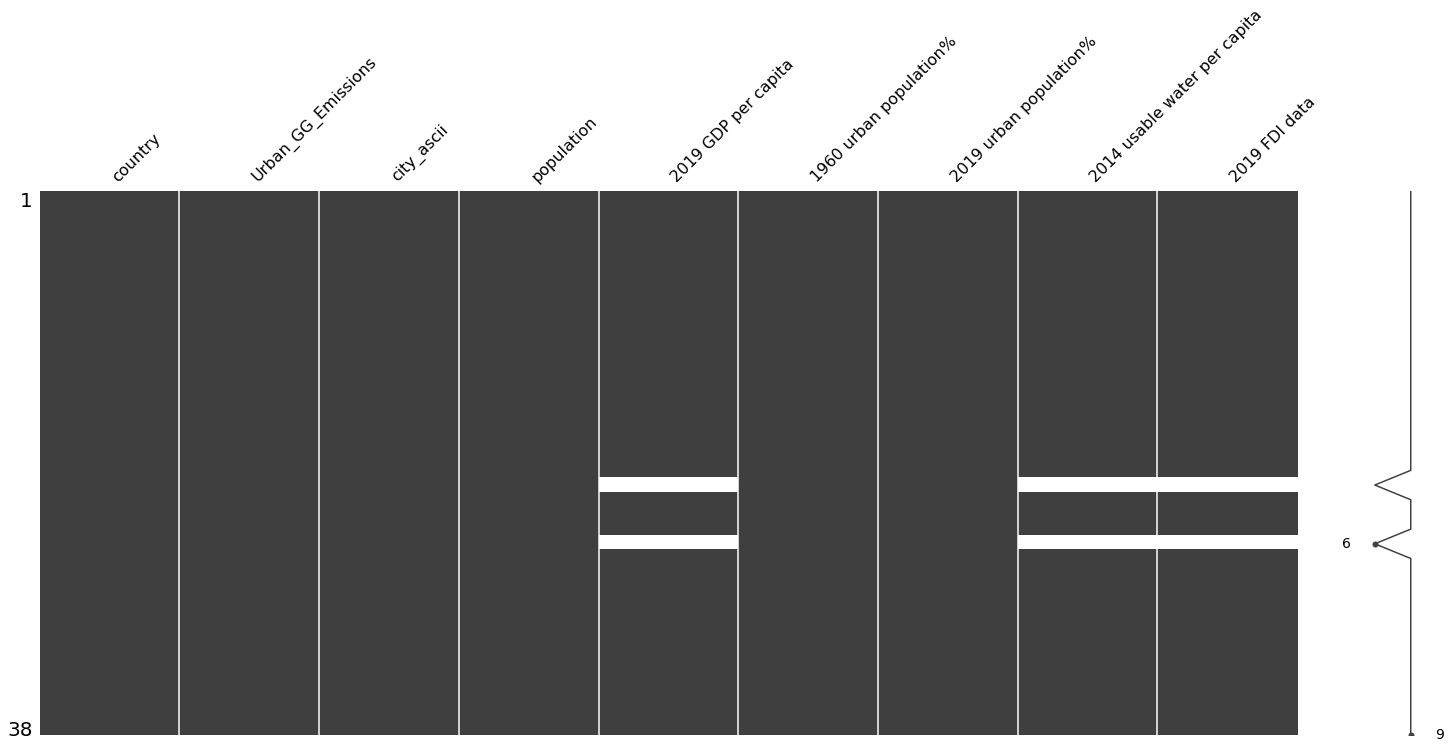

In [590]:
#Visually Checked to see the missing values
miss.matrix(SP1_model_data)

In [591]:
## Let us work on the missing values
SP1_model = SP1_model_data.dropna(axis='rows')
print(SP1_model)


           country  Urban_GG_Emissions  city_ascii   population  \
0        Australia            35825513         301   23508533.0   
1          Austria             4065351         134    4446483.0   
2          Belarus             4898939          89    6606289.0   
3          Belgium             9557424          77    3639342.0   
4         Bulgaria             3539432         133    5654453.0   
5           Canada            46462147         625   37747786.0   
6          Croatia             1060623          43    2065222.0   
7           Cyprus              503842           6     724091.0   
8          Denmark             3184115          12    1894253.0   
9          Estonia             1281879          25     846104.0   
10         Finland             3814445         107    4350445.0   
11          France            28246193         444   38429395.0   
12         Germany            61651682        1606   58243288.0   
13          Greece             5892085         125    4587831.

In [592]:
SP1_model.dtypes

country                          object
Urban_GG_Emissions                int64
city_ascii                        int64
population                      float64
2019 GDP per capita             float64
1960 urban population%          float64
2019 urban population%          float64
2014 usable water per capita    float64
2019 FDI data                   float64
dtype: object

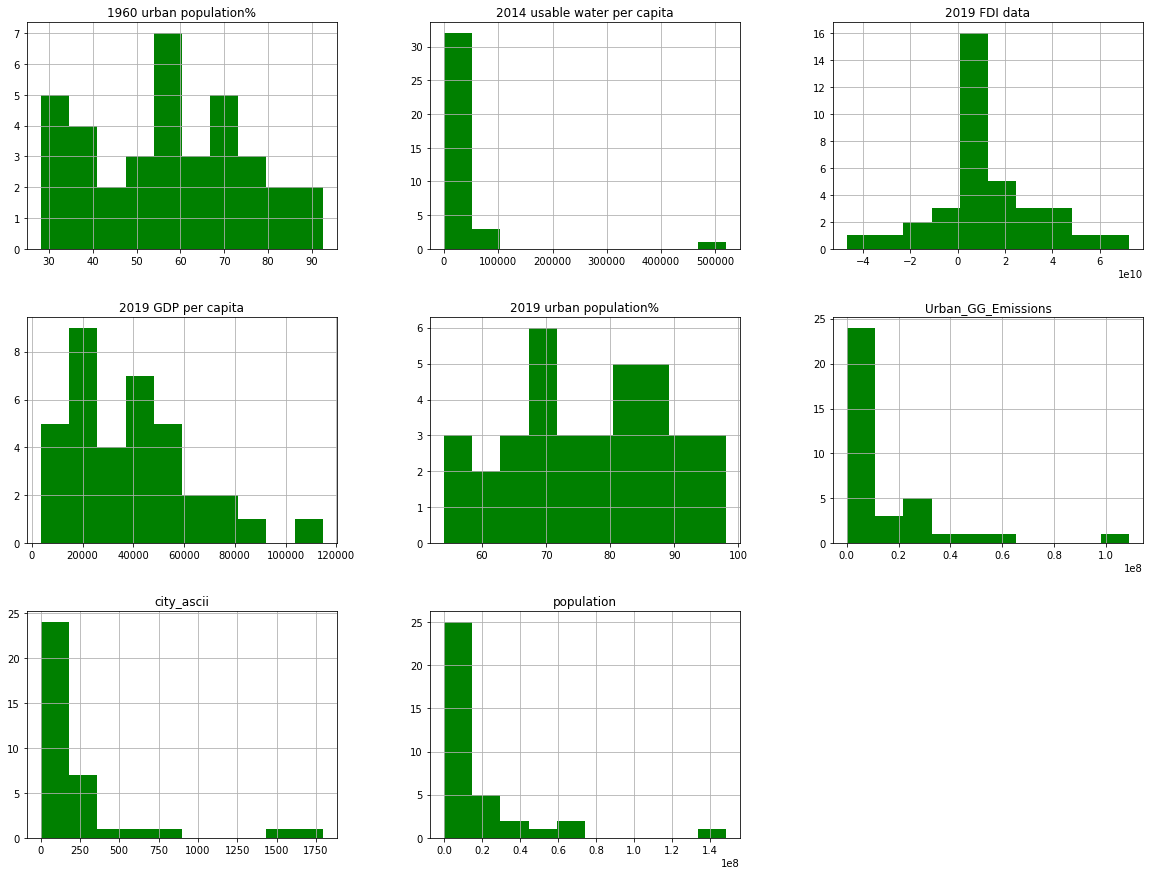

In [593]:
num_bins = 10

SP1_model.hist(bins = num_bins, figsize=(20,15),color = 'green')
plt.savefig("HistogramPlots")
plt.show()

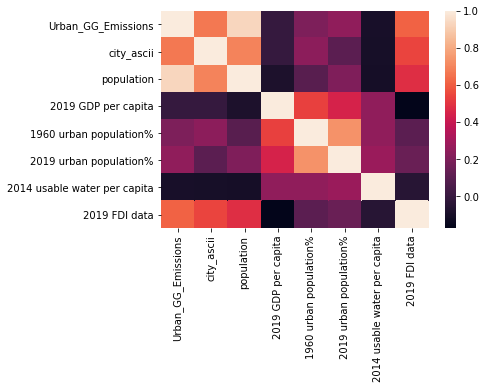

In [594]:
# Correlation between all the Parameters  
# if it is positive, the two variables tend to be high or low together
# If it is negative, the two variables tend to be opposite of each other
corr = SP1_model.corr()
# Correlation Plot
sns.heatmap(corr)

## Our Target variable is Urban_GG_Emissions,, Let us see the Independent variables that has the the highest correlation with this !

In [595]:
# Correlation Values of all the Features with respect to Target Variable 
## Top Values
print (corr['Urban_GG_Emissions'].sort_values(ascending=False)[:10], '\n')



Urban_GG_Emissions              1.000000
population                      0.932154
city_ascii                      0.668202
2019 FDI data                   0.614490
2019 urban population%          0.249003
1960 urban population%          0.198756
2019 GDP per capita            -0.006455
2014 usable water per capita   -0.097653
Name: Urban_GG_Emissions, dtype: float64 



In [596]:
## Visualising Correlation Matrix with actual Correlation Values
cmap=sns.diverging_palette(5, 250, as_cmap=True)
 

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'})\
    .set_precision(3) 

,Urban_GG_Emissions,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
Urban_GG_Emissions,1.000,0.668,0.932,-0.006,0.199,0.249,-0.098,0.614
city_ascii,0.668,1.000,0.693,-0.005,0.243,0.104,-0.101,0.546
population,0.932,0.693,1.000,-0.085,0.095,0.206,-0.109,0.484
2019 GDP per capita,-0.006,-0.005,-0.085,1.000,0.534,0.447,0.252,-0.173
1960 urban population%,0.199,0.243,0.095,0.534,1.000,0.735,0.251,0.106
2019 urban population%,0.249,0.104,0.206,0.447,0.735,1.000,0.276,0.145
2014 usable water per capita,-0.098,-0.101,-0.109,0.252,0.251,0.276,1.000,-0.052
2019 FDI data,0.614,0.546,0.484,-0.173,0.106,0.145,-0.052,1.000


In [597]:
## Let us split our small data set into training and test data 

In [598]:
y = SP1_model[['Urban_GG_Emissions']]
X = SP1_model.drop(columns=['Urban_GG_Emissions','country'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [599]:
print(train_X.shape[0]/SP1_model.shape[0])
print(test_X.shape[0]/SP1_model.shape[0])

0.75
0.25


In [600]:
## Since all the data including our Outcome variable are in Numerical, let us proceed to modelling

In [601]:
# Let's scale the data 
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [602]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,0.460078,1.000000,0.329485,0.545754,0.855700,0.006284,0.966578
1,1.000000,0.489167,0.347976,0.781873,0.672657,0.004100,0.776517
2,0.041318,0.024232,0.382345,1.000000,1.000000,0.001838,0.203759
3,0.001675,0.004564,0.217923,0.115538,0.289396,0.001080,0.812774
4,0.068118,0.153101,0.233730,0.441406,0.602430,0.004384,0.669663
5,0.011167,0.004462,0.198839,0.000000,0.016789,0.017217,0.557540
6,0.011725,0.012455,0.675416,0.264255,0.212048,0.020040,0.000000
7,0.029034,0.012239,0.142252,0.175174,0.313283,0.009932,0.553427
8,0.072585,0.037826,0.054739,0.138446,0.483723,0.005376,0.555165
9,0.003350,0.000991,1.000000,0.643551,0.844894,0.003239,0.406103


Cross Validation

In [603]:

fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)



In [604]:
use_metrics = ["neg_mean_squared_error"]

In [605]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [606]:
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [607]:


dt_scores = cross_validate(DT(),train_X,train_y, cv = fold_generator, scoring =use_metrics)



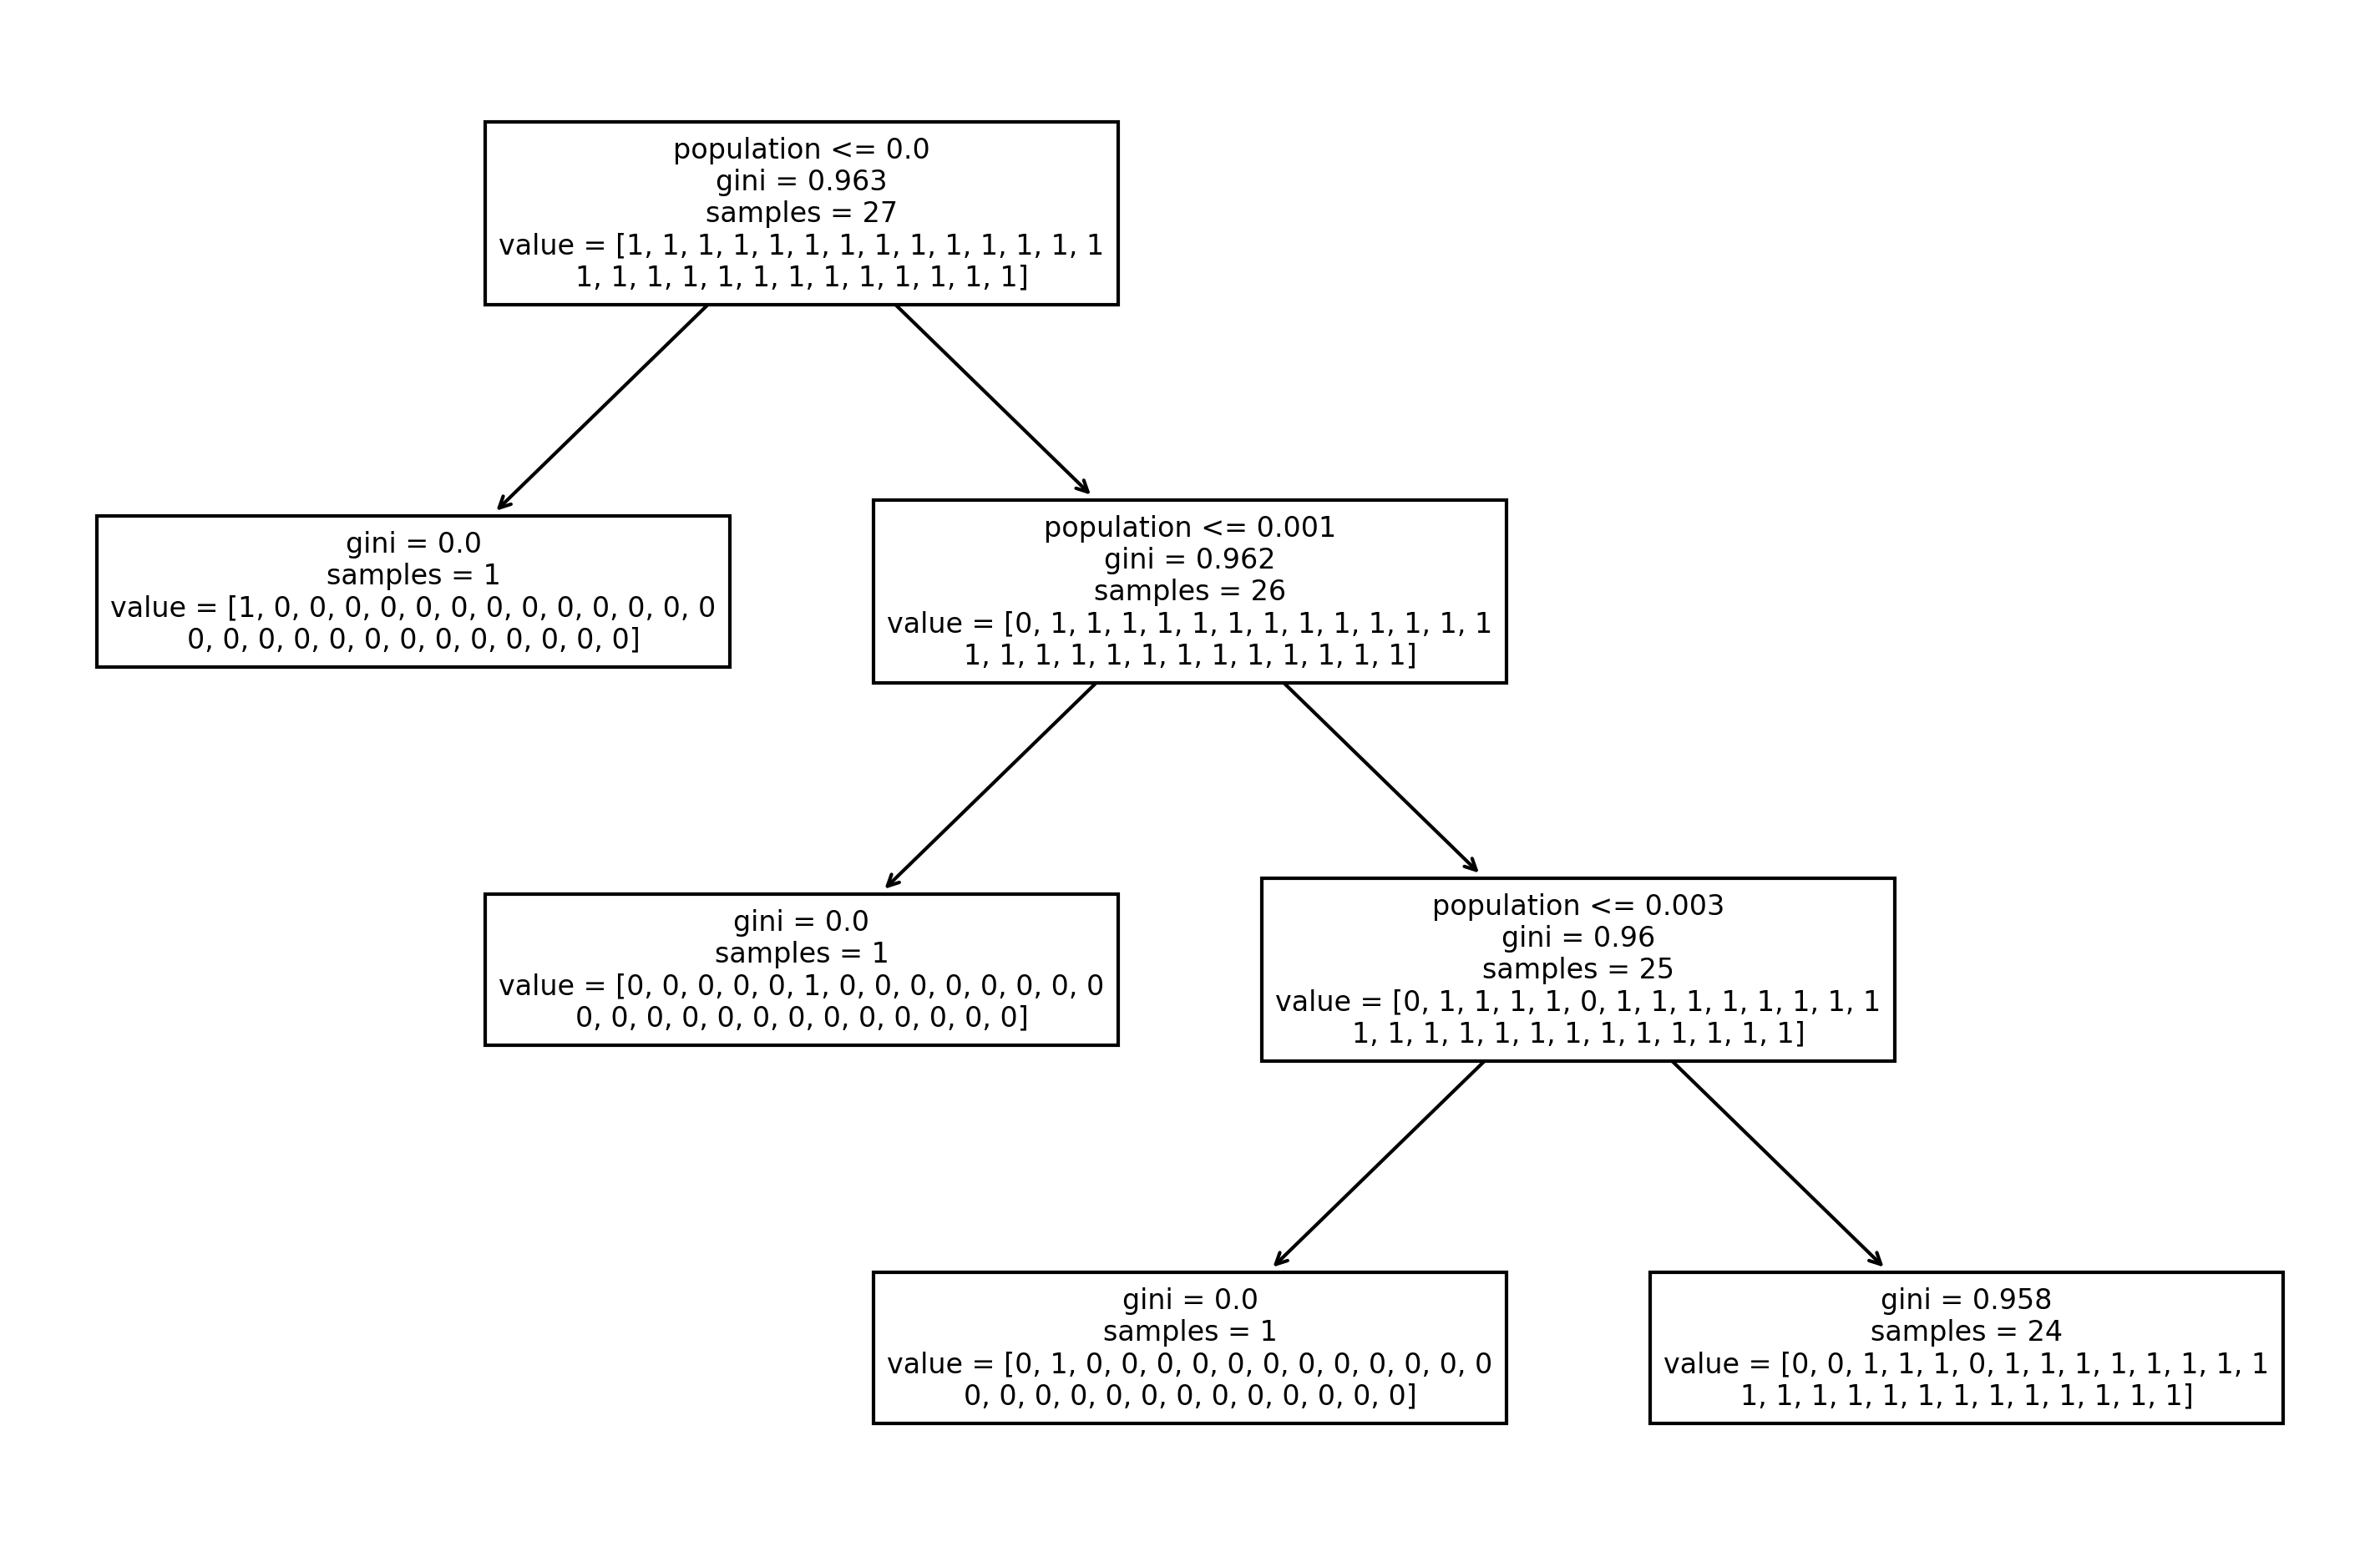

In [608]:
mod = DT(max_depth=3) # Initialize the modeling object (just as we did)
mod.fit(train_X,train_y) # Fit the mode

# Plot the tree
plt.figure(figsize=(12,8),dpi=300)
rules = tree.plot_tree(mod,feature_names = col_names,fontsize=8)

In [609]:


bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)



In [610]:
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [611]:
# Output is a dictionary 
lm_scores

{'fit_time': array([0.01096916, 0.00299144, 0.00598359, 0.0069809 , 0.00498581]),
 'score_time': array([0.00299549, 0.0039885 , 0.00299263, 0.00398946, 0.00299239]),
 'test_neg_mean_squared_error': array([-5.87338384e+13, -1.93300783e+14, -9.64092251e+13, -6.38456621e+13,
        -2.51816938e+13])}

In [612]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

,Model,MSE
0,lm,5.873384e+13
1,lm,1.933008e+14
2,lm,9.640923e+13
3,lm,6.384566e+13
4,lm,2.518169e+13
5,knn,1.792764e+14
6,knn,2.201371e+15
7,knn,1.636353e+14
8,knn,1.400262e+13
9,knn,1.248993e+14


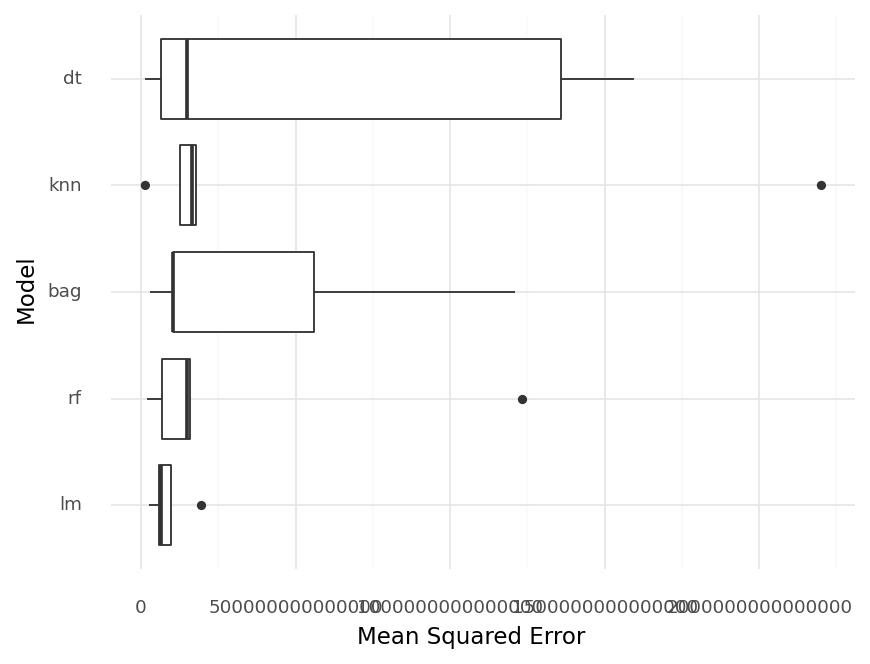

<ggplot: (170066573367)>

In [613]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)